<a href="https://colab.research.google.com/github/cdkontos/MSC-DWS-Machine-Learning-Course-Exercises/blob/main/Exercise_2_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from itertools import product

# Question 1

## Load Dataset

In [98]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Describe Dataset

In [99]:
df.describe(include='all')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Histograms

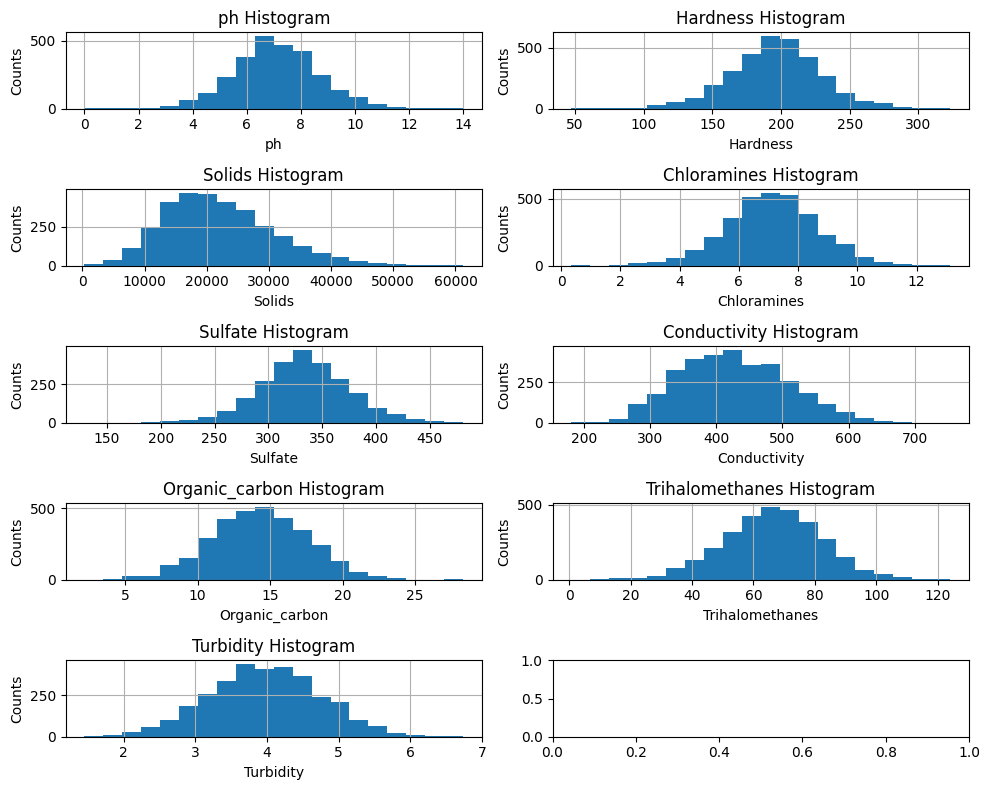

In [100]:
columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
figure, axes = plt.subplots(5, 2, figsize=(10,8))

axes = axes.flatten()
for i, col in enumerate(columns):
    df[col].hist(bins=20, ax=axes[i])
    axes[i].set_title(f'{col} Histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Counts')

plt.tight_layout()
plt.show()

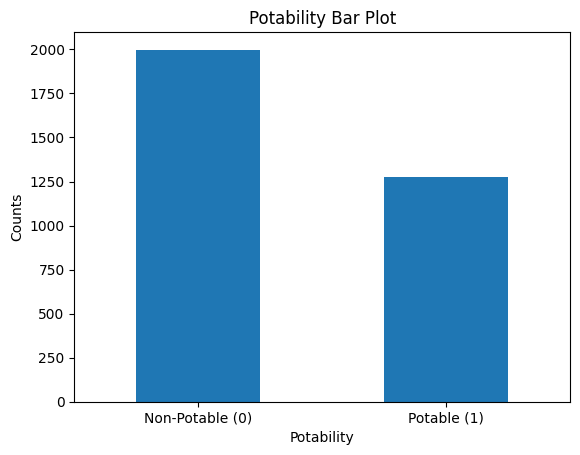

In [101]:
counts = df['Potability'].value_counts()
counts.plot.bar(rot = 0)
plt.title('Potability Bar Plot')
plt.xlabel('Potability')
plt.ylabel('Counts')
plt.xticks([0,1],['Non-Potable (0)', 'Potable (1)'])
plt.show()

## Missing Values and Percentages

In [102]:
missing_values = df.isnull().sum()
missing_values

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [103]:
counts/counts.sum()*100

,count
Potability,
0,60.989011
1,39.010989


I believe that the quality of the data is not satisfactory as there are large amounts of missing values in several characteristics, which could seriously impact the model that will be created and the subsequent predictions it will make.

# Question 2

In [104]:
bins = {'ph < 6.5': df['ph'] < 6.5,
        '6.5 <= ph <= 8.5': (df['ph'] >= 6.5) & (df['ph'] <= 8.5),
        'ph > 8.5': df['ph'] > 8.5}

summary = []
for key, value in bins.items():
    subset = df[value]
    total = len(subset)
    potable = subset['Potability'].sum()
    non_potable = total - potable
    summary.append({'range': key,
        'potable_pct': round(100*potable/total, 2),
        'non_potable_pct': round(100*non_potable/total, 2)
    })

pd.DataFrame(summary)


,range,potable_pct,non_potable_pct
0,ph < 6.5,36.78,63.22
1,6.5 <= ph <= 8.5,43.90,56.10
2,ph > 8.5,33.13,66.87


While a small percentage increase can be seen in the potable water in the range between ph values 6.5 and 8.5, it is not large enough to make it the sole reliable characteristic for predictions.

# Question 3

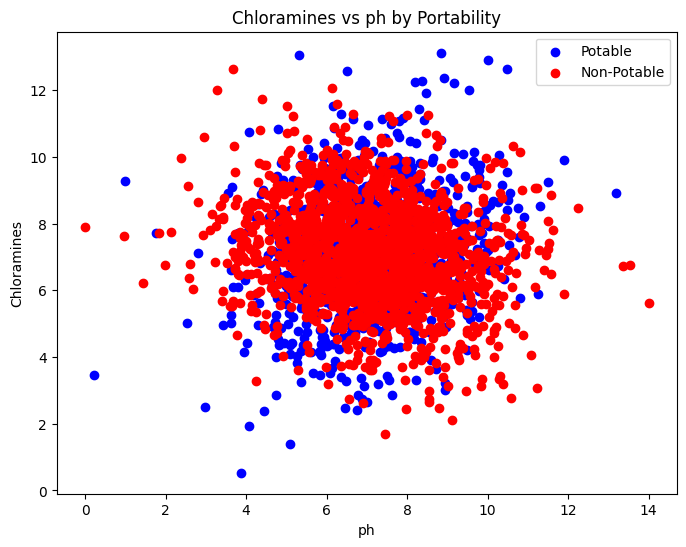

In [105]:
mask_p = df['Potability'] == 1
mask_np = df['Potability'] == 0
plt.figure(figsize=(8,6))
plt.scatter(df[mask_p]['ph'], df[mask_p]['Chloramines'], c='blue', label='Potable')
plt.scatter(df[mask_np]['ph'], df[mask_np]['Chloramines'], c='red', label='Non-Potable')
plt.legend()
plt.title('Chloramines vs ph by Portability')
plt.xlabel('ph')
plt.ylabel('Chloramines')
plt.show()

While the recommended chloramine levels are those up to 4 ppm, as can be seen in the plot most of the values far exceed that limitation while still being potable. Moreover, there is not a clear distinction between potable and non-potable points as all of them are concentrated in the center of the plot, thus making it difficult to predict the potability from just these characteristics.

# Question 4

In [106]:
df_filled = df.copy()
for col in df_filled.columns:
    if df_filled[col].isna().any():
      df_filled[col] = df_filled[col].fillna(df_filled[col].mean())
df_filled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# Question 5

## Convert DataFrame to Numpy arrays

In [107]:
input_df = df_filled.drop(columns=['Potability'])
targets_df = df_filled['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((3276, 9), (3276,))

## Split Dataset to Train-Test

In [108]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

# Question 6

## Create and train Decistion Tree Model

In [109]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

## Evaluate Model on test set

In [110]:
y_pred_test = model.predict(x_test)
y_pred_test

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [111]:
accuracy = accuracy_score(y_test, y_pred_test)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model on the test set is: {accuracy_percentage}')

The accuracy of the model on the test set is: 57.48


## Evaluate Model on training set

In [112]:
y_pred_train = model.predict(x_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 1])

In [113]:
accuracy = accuracy_score(y_train, y_pred_train)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model on the train set is: {accuracy_percentage}')

The accuracy of the model on the train set is: 100.0


# Question 7

In [114]:
criteria = ['gini', 'entropy']
max_depth = [None, 3, 5]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
max_features = [None, 'sqrt']
ccp = [0.0, 0.01]

results = []
for criteria, max_depth, min_samples_split, min_samples_leaf, max_features, ccp in product(
    criteria, max_depth, min_samples_split, min_samples_leaf, max_features, ccp):
  model = DecisionTreeClassifier(random_state=0,
      criterion=criteria,
      max_depth=max_depth,
      min_samples_split=min_samples_split,
      min_samples_leaf=min_samples_leaf,
      max_features=max_features,
      ccp_alpha=ccp)
  model.fit(x_train, y_train)
  y_pred_test = model.predict(x_test)
  accuracy_test = accuracy_score(y_test, y_pred_test)
  y_pred_train = model.predict(x_train)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  results.append({
      'criteria': criteria,
      'max_depth': max_depth,
      'min_samples_split': min_samples_split,
      'min_samples_leaf': min_samples_leaf,
      'max_features': max_features,
      'ccp': ccp,
      'accuracy_train': accuracy_train,
      'accuracy_test': accuracy_test
  })
df_results = pd.DataFrame(results)
df_results

,criteria,max_depth,min_samples_split,min_samples_leaf,max_features,ccp,accuracy_train,accuracy_test
0,gini,NaN,2,1,None,0.00,1.000000,0.574771
1,gini,NaN,2,1,None,0.01,0.605321,0.620549
2,gini,NaN,2,1,sqrt,0.00,1.000000,0.622584
3,gini,NaN,2,1,sqrt,0.01,0.605321,0.620549
4,gini,NaN,2,2,None,0.00,0.951592,0.581892
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,1,sqrt,0.01,0.620148,0.626653
92,entropy,5.0,5,2,None,0.00,0.671173,0.655137
93,entropy,5.0,5,2,None,0.01,0.620148,0.626653
94,entropy,5.0,5,2,sqrt,0.00,0.642826,0.620549


# Question 8

,criteria,max_depth,min_samples_split,min_samples_leaf,max_features,ccp,accuracy_train,accuracy_test
72,entropy,3.0,5,1,None,0.0,0.641082,0.639878


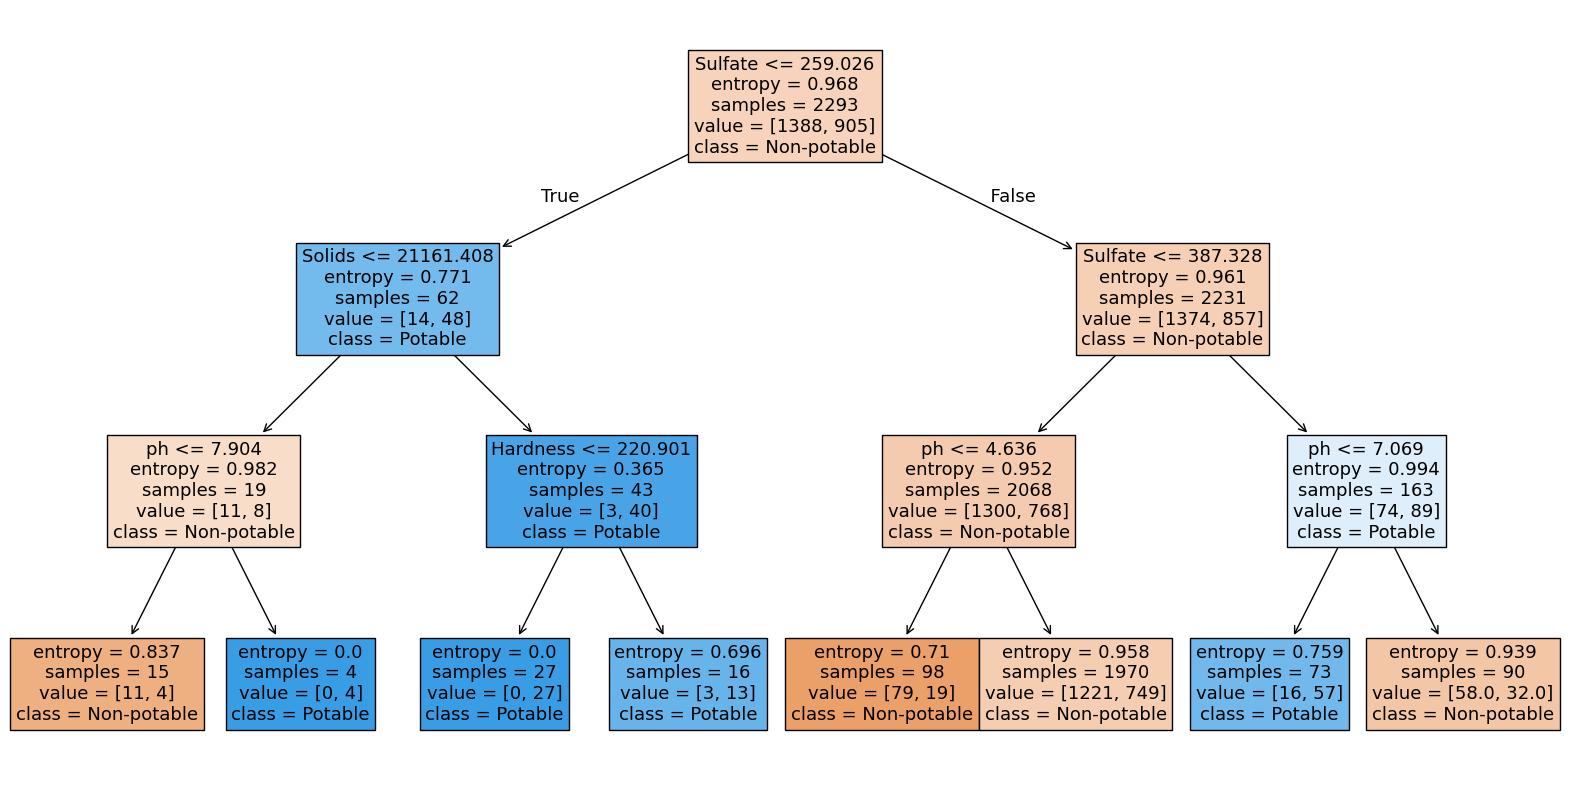

|--- Sulfate <= 259.03
|   |--- Solids <= 21161.41
|   |   |--- ph <= 7.90
|   |   |   |--- class: 0
|   |   |--- ph >  7.90
|   |   |   |--- class: 1
|   |--- Solids >  21161.41
|   |   |--- Hardness <= 220.90
|   |   |   |--- class: 1
|   |   |--- Hardness >  220.90
|   |   |   |--- class: 1
|--- Sulfate >  259.03
|   |--- Sulfate <= 387.33
|   |   |--- ph <= 4.64
|   |   |   |--- class: 0
|   |   |--- ph >  4.64
|   |   |   |--- class: 0
|   |--- Sulfate >  387.33
|   |   |--- ph <= 7.07
|   |   |   |--- class: 1
|   |   |--- ph >  7.07
|   |   |   |--- class: 0



In [115]:
depth3_best = df_results[df_results['max_depth'] == 3.0].sort_values('accuracy_test', ascending=False).head(1)
display(depth3_best)
best_depth3_params = depth3_best.iloc[0].to_dict()
best_depth3_model = DecisionTreeClassifier(
    random_state=0,
    criterion=best_depth3_params['criteria'],
    max_depth=int(best_depth3_params['max_depth']),
    min_samples_split=int(best_depth3_params['min_samples_split']),
    min_samples_leaf=int(best_depth3_params['min_samples_leaf']),
    max_features=best_depth3_params['max_features'],
    ccp_alpha=float(best_depth3_params['ccp']))
best_depth3_model.fit(x_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(best_depth3_model, feature_names=df_filled.drop(columns=['Potability']).columns, class_names=['Non-potable','Potable'], filled=True, fontsize=13)
plt.show()
rules = export_text(best_depth3_model, feature_names=df_filled.drop(columns=['Potability']).columns)
print(rules)

The rules created by the tree are as seen above. First it checks whether the sulfate levels are above or below 259.03. If they are below, it then checks the solids and for a value above 21161.41, it checks the hardness for a value above or below 220.9 but it assigns both to class 1. If the solids value is below or equal, it checks the ph and if its value is higher than 7.9 it gets assigned to class 1, otherwise to class 0. If the sulfate value is above 259.03, the model then check again whether the sulfate is above or below 387.33. If it is below or equal it then further checks the ph value but it ultimately assigns both to class 0. If the value is above it also checks the ph values but if it is above 7.07 it assigns class 0, otherwise class 1.

# Question 9/10

,criteria,max_depth,min_samples_split,min_samples_leaf,max_features,ccp,accuracy_train,accuracy_test
92,entropy,5.0,5,2,None,0.0,0.671173,0.655137


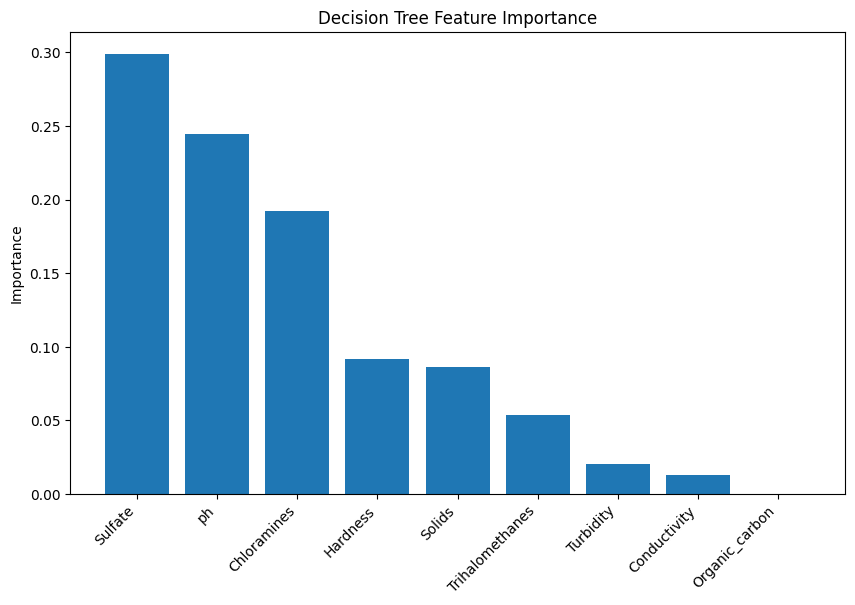

,feature,importance
4,Sulfate,0.298956
0,ph,0.244768
3,Chloramines,0.191956
1,Hardness,0.091392
2,Solids,0.086400
7,Trihalomethanes,0.053536
8,Turbidity,0.020127
5,Conductivity,0.012864
6,Organic_carbon,0.000000


In [116]:
best_overall_params = df_results.sort_values('accuracy_test', ascending=False).iloc[0]
display(best_overall_params.to_frame().T)

best_overall_model = DecisionTreeClassifier(
    random_state=0,
    criterion=best_overall_params['criteria'],
    max_depth=int(best_overall_params['max_depth']),
    min_samples_split=int(best_overall_params['min_samples_split']),
    min_samples_leaf=int(best_overall_params['min_samples_leaf']),
    max_features=best_overall_params['max_features'],
    ccp_alpha=float(best_overall_params['ccp']))
best_overall_model.fit(x_train, y_train)

features = df_filled.drop(columns=['Potability']).columns
importances = best_overall_model.feature_importances_
df_feat_importances = pd.DataFrame({'feature': features, 'importance': importances}).sort_values('importance', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(df_feat_importances['feature'], df_feat_importances['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Decision Tree Feature Importance')
plt.ylabel('Importance')
plt.show()

display(df_feat_importances)

If the device can only support up to 5 analyses then it should extract Sulfate, ph, Chloramines, Hardness and Solids from the water, as according to the bar plot and the feature importance list they are the top 5 most important ones for predictions.

# Question 11

A Random Forest might achieve higher accuracy than a Decision Tree due to the way it combines various Decision Trees through methods like bagging and random feature selection, in order to differentiate them from each other while still using the same data set. This lowers the variance that a single tree might produce and provides more accurate results through the sheer amount of different combinations as it avoids overfitting and artificially provides a wider data set for model creation.

# Question 12

In [96]:
n_estimators = [50, 100, 200]
criteria = ['gini', 'entropy']
max_depth = [None, 3, 5]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
max_features = [None, 'sqrt']
ccp = [0.0, 0.01]
results_rf =[]
for n_estimator, criteria, max_depth, min_samples_split, min_samples_leaf, max_features, ccp in product(
    n_estimators, criteria, max_depth, min_samples_split, min_samples_leaf, max_features, ccp):
  model_rf = RandomForestClassifier(random_state=0,
                                 n_estimators=n_estimator,
                                 criterion=criteria,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 max_features=max_features,
                                 ccp_alpha=ccp)
  model_rf.fit(x_train, y_train)
  y_pred_test = model_rf.predict(x_test)
  accuracy_test = accuracy_score(y_test, y_pred_test)
  y_pred_train = model_rf.predict(x_train)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  results_rf.append({
      'n_estimators': n_estimator,
      'criteria': criteria,
      'max_depth': max_depth,
      'min_samples_split': min_samples_split,
      'min_samples_leaf': min_samples_leaf,
      'max_features': max_features,
      'ccp': ccp,
      'accuracy_train': accuracy_train,
      'accuracy_test': accuracy_test
  })
df_results = pd.DataFrame(results_rf)
df_results

,n_estimators,criteria,max_depth,min_samples_split,min_samples_leaf,max_features,ccp,accuracy_train,accuracy_test
0,50,gini,NaN,2,1,None,0.00,1.000000,0.672431
1,50,gini,NaN,2,1,None,0.01,0.619712,0.626653
2,50,gini,NaN,2,1,sqrt,0.00,1.000000,0.693795
3,50,gini,NaN,2,1,sqrt,0.01,0.605321,0.620549
4,50,gini,NaN,2,2,None,0.00,0.997819,0.669379
...,...,...,...,...,...,...,...,...,...
283,200,entropy,5.0,5,1,sqrt,0.01,0.624509,0.628688
284,200,entropy,5.0,5,2,None,0.00,0.695159,0.660224
285,200,entropy,5.0,5,2,None,0.01,0.646751,0.646999
286,200,entropy,5.0,5,2,sqrt,0.00,0.682948,0.648016


# Question 13

It is more important for the model to more accurately predict the potable water while losing accuracy on the non-potable than the opposite. This is because a false positive, that is the device predicting that a water source is potable when it is not, is dangerous as it can create serious health issues. As such, false negatives, that is predicting that potable water is non-potable are preferable, as this will just lead some water sources not being used, without any health implications or further complications with the law.

# Question 14

While the Random Forest classifier will be more accurate than the Decision Tree generally, its predictions cannot be easily explained and thus are difficult to support legally. On the other hand, the Decision Tree creates clear rules that can be explained by a human and can be supported properly, although a hit will be taken in the accuracy.